# Billionaires Statistics Dataset - Exploratory Data Analysis

## 1. Data Loading

In [138]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import plotly.graph_objects as go
from wordcloud import WordCloud

In [139]:
#Import Data
df = pd.read_csv('/Users/mad_over_minions/Desktop/Billionaires Statistics Dataset.csv')

In [140]:
df.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2640 non-null   int64  
 1   finalWorth                                  2640 non-null   int64  
 2   category                                    2640 non-null   object 
 3   personName                                  2640 non-null   object 
 4   age                                         2575 non-null   float64
 5   country                                     2602 non-null   object 
 6   city                                        2568 non-null   object 
 7   source                                      2640 non-null   object 
 8   industries                                  2640 non-null   object 
 9   countryOfCitizenship                        2640 non-null   object 
 10  organization

In [142]:
df.columns

Index(['rank', 'finalWorth', 'category', 'personName', 'age', 'country',
       'city', 'source', 'industries', 'countryOfCitizenship', 'organization',
       'selfMade', 'status', 'gender', 'birthDate', 'lastName', 'firstName',
       'title', 'date', 'state', 'residenceStateRegion', 'birthYear',
       'birthMonth', 'birthDay', 'cpi_country', 'cpi_change_country',
       'gdp_country', 'gross_tertiary_education_enrollment',
       'gross_primary_education_enrollment_country', 'life_expectancy_country',
       'tax_revenue_country_country', 'total_tax_rate_country',
       'population_country', 'latitude_country', 'longitude_country'],
      dtype='object')

In [143]:
df.isnull().sum()

rank                                             0
finalWorth                                       0
category                                         0
personName                                       0
age                                             65
country                                         38
city                                            72
source                                           0
industries                                       0
countryOfCitizenship                             0
organization                                  2315
selfMade                                         0
status                                           0
gender                                           0
birthDate                                       76
lastName                                         0
firstName                                        3
title                                         2301
date                                             0
state                          

## 2. Data Cleaning

In [144]:
df.describe()

,rank,finalWorth,age,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
count,2640.000000,2640.000000,2575.000000,2564.000000,2564.000000,2564.000000,2456.000000,2456.000000,2458.000000,2459.000000,2458.000000,2457.000000,2458.000000,2.476000e+03,2476.000000,2476.000000
mean,1289.159091,4623.787879,65.140194,1957.183307,5.740250,12.099844,127.755204,4.364169,67.225671,102.858520,78.122823,12.546235,43.963344,5.102053e+08,34.903592,12.583156
std,739.693726,9834.240939,13.258098,13.282516,3.710085,9.918876,26.452951,3.623763,21.343426,4.710977,3.730099,5.368625,12.145296,5.542447e+08,17.003497,86.762989
min,1.000000,1000.000000,18.000000,1921.000000,1.000000,1.000000,99.550000,-1.900000,4.000000,84.700000,54.300000,0.100000,9.900000,3.801900e+04,-40.900557,-106.346771
25%,659.000000,1500.000000,56.000000,1948.000000,2.000000,1.000000,117.240000,1.700000,50.600000,100.200000,77.000000,9.600000,36.600000,6.683440e+07,35.861660,-95.712891
50%,1312.000000,2300.000000,65.000000,1957.000000,6.000000,11.000000,117.240000,2.900000,65.600000,101.800000,78.500000,9.600000,41.200000,3.282395e+08,37.090240,10.451526
75%,1905.000000,4200.000000,75.000000,1966.000000,9.000000,21.000000,125.080000,7.500000,88.200000,102.600000,80.900000,12.800000,59.100000,1.366418e+09,40.463667,104.195397
max,2540.000000,211000.000000,101.000000,2004.000000,12.000000,31.000000,288.570000,53.500000,136.600000,142.100000,84.200000,37.200000,106.300000,1.397715e+09,61.924110,174.885971


In [145]:
def missing(df):
    missing_values = df.isnull().sum()
    missing_percent = (missing_values / len(df)) * 100
    missing_df = pd.concat([missing_values, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    high_missing_df = missing_df[missing_df['Missing_Percent']>1]
    # Sort the DataFrame by 'Missing_Percent' in ascending order
    high_missing_df_sorted = high_missing_df.sort_values(by='Missing_Percent', ascending=False)
    
    return high_missing_df_sorted
missing(df)

,Missing_Number,Missing_Percent
organization,2315,87.689394
title,2301,87.159091
residenceStateRegion,1893,71.704545
state,1887,71.477273
cpi_country,184,6.969697
cpi_change_country,184,6.969697
tax_revenue_country_country,183,6.931818
gross_tertiary_education_enrollment,182,6.893939
total_tax_rate_country,182,6.893939
life_expectancy_country,182,6.893939


In [146]:
#drop these columns organization,resident state region,state
df=df.drop(columns=['state','organization','residenceStateRegion','birthDay','birthMonth','birthYear','birthDate'])


In [147]:
# Replacing Missing Values in Country Column by Mode because of few values
most_frequent_country = df['country'].mode()[0]
df['country'].fillna(most_frequent_country, inplace=True)

In [148]:
#imputing values of below columns using the specific country as reference, as these values remain same for that specific country
columns_to_impute = [
    'gross_tertiary_education_enrollment',
    'gross_primary_education_enrollment_country',
    'life_expectancy_country',
    'tax_revenue_country_country',
    'total_tax_rate_country',
    'population_country',
    'latitude_country',
    'longitude_country',
    'cpi_country',
    'cpi_change_country'
]

# Impute missing values for each specified column based on 'country'
df[columns_to_impute] = df.groupby('country')[columns_to_impute].transform(lambda x: x.fillna(x.mean() if not x.mode().empty else np.nan))

# If there are still missing values after group-wise imputation, fill them with the overall mean
df[columns_to_impute] = df[columns_to_impute].apply(lambda x: x.fillna(x.mean() if not x.mode().empty else np.nan))



In [149]:
# Replace $ and , and convert to numeric
df['gdp_country'] = pd.to_numeric(df['gdp_country'].replace('[\$,]', '', regex=True), errors='coerce')

# Impute missing values based on 'country'
df['gdp_country'] = df.groupby('country')['gdp_country'].transform(lambda x: x.fillna(x.mean() if not x.mode().empty else np.nan))

# If there are still missing values after group-wise imputation, fill them with the overall mean
df['gdp_country'].fillna(df['gdp_country'].mean(), inplace=True)

In [150]:
#Impute missing values in city based on 'country'
df['city'] = df.groupby('country')['city'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan))
df['city'].fillna(df['city'].mode()[0], inplace=True)

In [151]:
df.isnull().sum()

rank                                             0
finalWorth                                       0
category                                         0
personName                                       0
age                                             65
country                                          0
city                                             0
source                                           0
industries                                       0
countryOfCitizenship                             0
selfMade                                         0
status                                           0
gender                                           0
lastName                                         0
firstName                                        3
title                                         2301
date                                             0
cpi_country                                      0
cpi_change_country                               0
gdp_country                    

## 3.Data visualizations

In [248]:
#1.World stats on Billionaires and where they are from

# Choropleth Map
billionaires_count = df['country'].value_counts().reset_index().rename(columns={'index': 'country'})

fig_choropleth = px.choropleth(billionaires_count, 
                                locations='country',
                                color='count',
                                color_continuous_scale='plasma',
                                title='Number of Billionaires by Country',
                                labels={'count': 'Number of Billionaires'},
                                locationmode='country names')

fig_bar = px.bar(billionaires_count, 
                x='country', 
                y='count',
                color='count',
                title='Number of Billionaires Globally',
                labels={'count': 'Number of Billionaires'},
                color_continuous_scale='plasma',  # Choose a color scale
                )

fig_choropleth.update_layout(
    geo=dict(showcoastlines=True, showland=True, landcolor="white"),
    coloraxis_colorbar=dict(title='Number of Billionaires', tickformat=','),
    margin=dict(l=0, r=0, b=0, t=50),  # Adjust margins
    width=800,  # Set the width of the figure
    height=500,  # Set the height of the figure
)
fig_choropleth.show()

#Top 10 countries with most billionaires
df_country = df['country'].value_counts().reset_index().sort_values(by='count', ascending=False)

# Create a Treemap for the number of billionaires by industry
fig = px.treemap(df_country.head(10), 
                 values='count', 
                 path=['country'], 
                 title='Top 10 countries with most billionaires',
                 color='count', 
                 color_continuous_scale='plasma'
                )
fig.update_traces(textinfo="label+value")
fig.update_layout(margin=dict(l=0, r=0, b=0, t=50),  # Adjust margins
    width=800,  # Set the width of the figure
    height=500,)
fig.show()



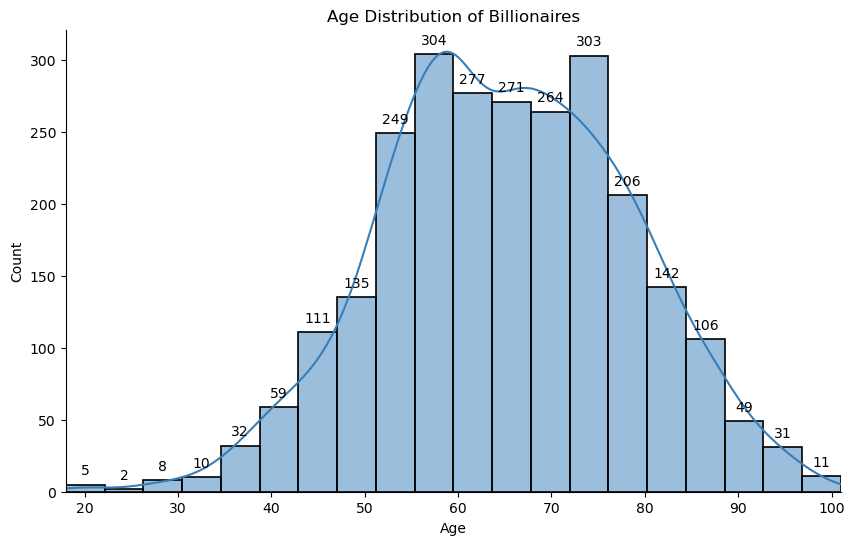

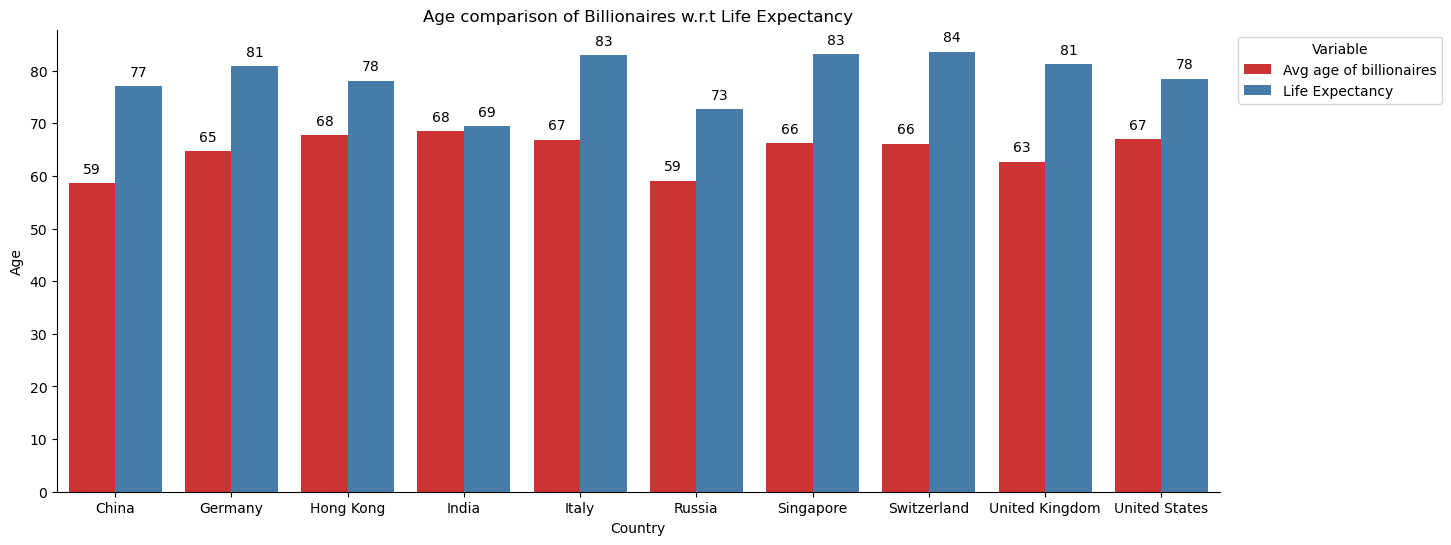

In [243]:
#2. Age distribution of Billionaires
plt.figure(figsize=(10, 6))
ax = sns.histplot(df['age'], bins=20, kde=True, color='#377EB8', edgecolor='black', linewidth=1.2)

# Customizing the plot
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of Billionaires')
plt.xlim(df['age'].min(), df['age'].max())

# Adding data labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

# Removing top and right spines for aesthetics
sns.despine(top=True, right=True)

# Show the plot
plt.show()

#Avg age of billionaire's vs life expectency in each country
d= df[['country','age', 'life_expectancy_country']]
avg_age = d.groupby('country')[['age','life_expectancy_country']].mean().reset_index()
avg_age.columns = ['Country', 'Avg age of billionaires', 'Life Expectancy']
countries = ['United States','China', 'India','Germany','United Kingdom','Switzerland','Hong Kong',
            'Russia', 'Italy','Singapore',]
top_countries_age = avg_age.loc[avg_age['Country'].isin(countries)]
top_countries_age.fillna(85.39)
              
# Melt the DataFrame to convert it to long format
df_long = pd.melt(top_countries_age, id_vars='Country', var_name='Variable', value_name='Value')

plt.figure(figsize=(15, 6))
# Create a barplot with color
c_plot = sns.barplot(x='Country', y='Value', hue='Variable', data=df_long, palette='Set1')

# Removing top and right spines for aesthetics
sns.despine(top=True, right=True)

# Customize the plot
plt.title('Age comparison of Billionaires w.r.t Life Expectancy')
plt.xlabel('Country')
plt.ylabel('Age')
plt.legend(title='Variable', bbox_to_anchor=(1.01, 1), loc='upper left')  # Adjust legend position

for p in c_plot.patches:
    c_plot.annotate (f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


In [107]:
#3. No of Billionaires in each industry and percentage contribution of wealth by industries
# Get the count of billionaires by industry
df_industry_count = df['industries'].value_counts().reset_index()

# Create an interactive bar plot for the number of billionaires by industry
fig = px.bar(df_industry_count, 
              x='industries', 
              y='count', 
              orientation='v',  # Horizontal orientation for better readability
              title='Number of Billionaires by Industry',
              labels={'count': 'Number of Billionaires', 'industries': 'Industry'},
              color='count',  # Color by count for visual emphasis
              color_continuous_scale='Viridis',  # Choose a color scale
              )
fig.show()

import plotly.graph_objects as go

# Get unique industries and calculate total wealth
industries = df['industries'].value_counts().index.tolist()
total_wealth = df['finalWorth'].sum()

# Calculate wealth for each industry
industry_data = df.groupby('industries')['finalWorth'].sum().reset_index()

# Calculate percentage contributions
industry_data['percentage'] = (industry_data['finalWorth'] / total_wealth) * 100

# Create a sunburst chart
fig1 = go.Figure(go.Sunburst(
    labels=industries,
    parents=[''] * len(industries),
    values=industry_data['finalWorth'],
    textinfo='label+percent entry',
))
#fig = px.pie(df, names='Category', values='Values', hole=0.4)

# Update layout for better visualization
fig1.update_layout(
    title='Industry Contribution in Wealth',
    width=700,
    height=500,
    margin=dict(t=50, l=50, r=50, b=50),  # Adjust margin
    paper_bgcolor="white",  # Set white background
    sunburstcolorway=["#636efa", "#ef553b", "#00cc96", "#ab63fa", "#19d3f3", "#ff7f0e", "#d62728", "#9467bd", "#8c564b"],  # Custom color palette
    )

# Show the plot
fig1.show()


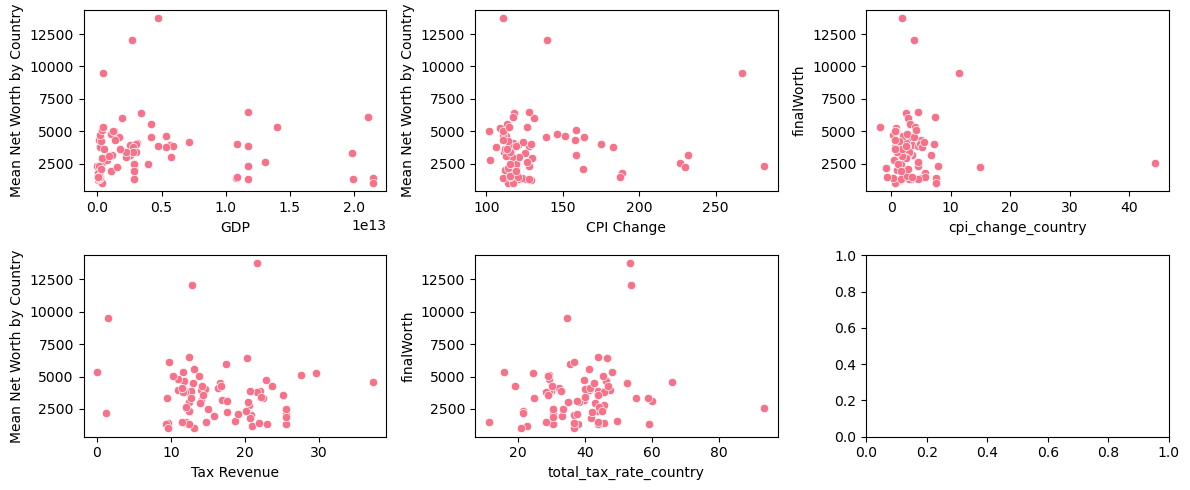

In [183]:
#4.How does gdp,cpi and tax affect the wealthiness of these billionaire's

gdp_worth = df.groupby('countryOfCitizenship')[['finalWorth','gdp_country']].mean().reset_index()
cpi_worth = df.groupby('countryOfCitizenship')[['finalWorth','cpi_country']].mean().reset_index()
cpi_change_worth = df.groupby('countryOfCitizenship')[['finalWorth','cpi_change_country']].mean().reset_index()
tax_worth = df.groupby('countryOfCitizenship')[['finalWorth','tax_revenue_country_country']].mean().reset_index()
total_tax_worth = df.groupby('countryOfCitizenship')[['finalWorth','total_tax_rate_country']].mean().reset_index()

fig, axes = plt.subplots(2,3, figsize=(12,5))

## Plot the relationship between the country's GDP and the mean net worth of billionaires from that country
sns.scatterplot(data=gdp_worth, x='gdp_country', y='finalWorth', ax=axes[0,0])
axes[0,0].set_xlabel('GDP')
axes[0,0].set_ylabel('Mean Net Worth by Country')

## Plot the relationship between the country's CPI and the mean net worth of billionaires from that country
sns.scatterplot(data=cpi_worth, x='cpi_country', y='finalWorth', ax=axes[0,1])
axes[0,1].set_xlabel('CPI')
axes[0,1].set_ylabel('Mean Net Worth by Country')

## Plot the relationship between the country's CPI change and the mean net worth of billionaires from that country
sns.scatterplot(data=cpi_change_worth, x='cpi_change_country', y='finalWorth', ax=axes[0,2])
axes[0,1].set_xlabel('CPI Change')
axes[0,1].set_ylabel('Mean Net Worth by Country')

## Plot the relationship between the country's tax revenue and the mean net worth of billionaires from that country
sns.scatterplot(data=tax_worth, x='tax_revenue_country_country', y='finalWorth', ax=axes[1,0])
axes[1,0].set_xlabel('Tax Revenue')
axes[1,0].set_ylabel('Mean Net Worth by Country')

sns.scatterplot(data=total_tax_worth, x='total_tax_rate_country', y='finalWorth', ax=axes[1,1])

plt.tight_layout()
plt.show()

In [170]:
#5.Who Are More Likely to be Self-Made Billionaires, Men or Women?
#Analyzing the self-made status among billionaires, differentiated by gender.

df['selfMade'].value_counts()
#first let's create the new column with mapped value of Selfmade i.e. Selfmade for True and !selfmade for False.
df['selfMade_indicator']=df['selfMade'].map({True:'Self Made Billionaires',False:'Inherited Wealth'})
#df['selfMade_indicator'].head(10)

#now let's create a plotly donut chart
fig1=px.pie(df,names='selfMade_indicator',title='Selfmade vs Inherited',hole=0.4)
fig1.show()

#Almost 69% billionaire seems to be self made and remaining are not self made.

#lets create stacked bar chart to indicate the ratio of male vs female in the self made vs inherited race
selfmadeMF = df.groupby(['gender', 'selfMade_indicator']).size().reset_index(name='count')

fig2 = px.bar(selfmadeMF, x='gender', y='count', color='selfMade_indicator',
             labels={'count': 'Count', 'selfMade_indicator': 'Status'},
             title='Selfmade vs Inherited Status Distribution by Gender',
             barmode='relative',
            width=600)

fig2.show()

In [ ]:
#If we study the above stacked bar plot we see that more than 70% of female billionaire are not self made 
#in contrast to the almost 75% self made male billionaire's population.

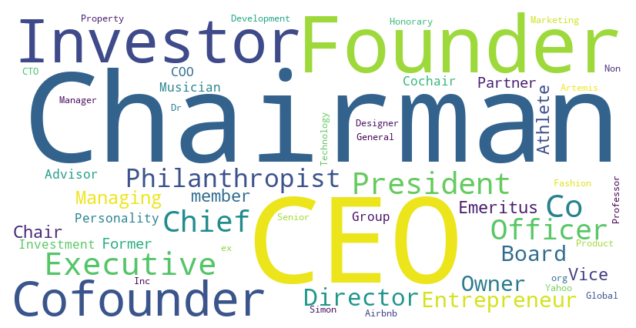

In [246]:
#6.Plot a wordcloud to visualize the most number of billionaire titles
df_title = df.dropna(subset=['title'])

text_title = ' '.join(df_title['title'])

wc = WordCloud(width=800, height=400, background_color='white',mode = 'RGBA').generate(text_title)

plt.figure(figsize=(14,4))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [177]:
df.to_csv('Cleaned_billionaire_data.csv', index=False)